<a href="https://colab.research.google.com/github/Roohi510/Roohi510/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. to handle the data
import pandas as pd
import numpy as np

# 2. for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import GaussianNB
from sklearn.naive_bayes import GaussianNB

# 3. for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
# 4. import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [3]:
path ="/content/drive/MyDrive/datasets/heart/heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

* A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

* This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* age: Represents the age of the individuals in the dataset.
* sex: Indicates the gender of the individuals, typically encoded as binary values (e.g., 0 for female, 1 for male).
* cp: Stands for "chest pain type" and represents the type of chest pain experienced by the individuals.
* trestbps: Denotes the resting blood pressure of the individuals (in mm Hg).
* chol: Represents the serum cholesterol level of the individuals (in mg/dl).
* fbs: Indicates the fasting blood sugar level of the individuals (> 120 mg/dl is typically considered high).
* restecg: Describes the resting electrocardiographic results of the individuals.
* thalach: Represents the maximum heart rate achieved by the individuals.
* exang: Indicates whether the individuals experience exercise-induced angina (1 for yes, 0 for no).
* oldpeak: Represents the ST depression induced by exercise relative to rest.
* slope: Describes the slope of the peak exercise ST segment.
* ca: Represents the number of major vessels (0-3) colored by fluoroscopy.
* thal: Denotes a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).
* target: Represents the presence of heart disease in the individuals (1 for presence, 0 for absence).

# no of males and females

In [ ]:
male_count = df[df['sex'] == 1]['sex'].count()
female_count = df[df['sex'] == 0]['sex'].count()

print("Number of males:", male_count)
print("Number of females:", female_count)

Number of males: 713
Number of females: 312


In [ ]:
age_bins = [20, 40, 50, 60, float('inf')]  # Define the age group boundaries
age_labels = ['Child', 'Young Adult', 'Adult', 'Elderly']  # Define the labels for each age group

# Create a new column 'age_group' containing the age group labels
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of individuals in each age group
age_group_counts = df['age_group'].value_counts()

print(age_group_counts)

age_group
Adult          422
Elderly        309
Young Adult    237
Child           57
Name: count, dtype: int64


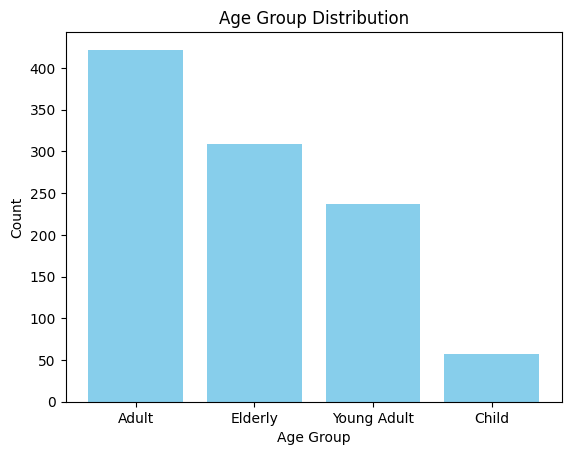

In [ ]:
age_bins = [20, 40, 50,60, float('inf')]  # Define the age group boundaries
age_labels = ['Child', 'Young Adult', 'Adult', 'Elderly']  # Define the labels for each age group

# Create a new column 'age_group' containing the age group labels
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of individuals in each age group
age_group_counts = df['age_group'].value_counts()

# Plot the age group distribution
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame if it's different

# Select the column you want to analyze
age_column = df['age']

# Count the distinct values
distinct_count = age_column.nunique()

# Calculate the percentage of unique values
unique_percentage = distinct_count / len(age_column) * 100

# Count the missing values
missing_count = age_column.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_count / len(age_column)) * 100

# Count the infinite values
infinite_count = age_column.isin([float('inf'), float('-inf')]).sum()

# Calculate the percentage of infinite values
infinite_percentage = (infinite_count / len(age_column)) * 100

# Calculate the mean
mean_value = age_column.mean()

# Find the minimum and maximum values
min_value = age_column.min()
max_value = age_column.max()

# Count the zeros
zero_count = (age_column == 0).sum()

# Calculate the percentage of zeros
zero_percentage = (zero_count / len(age_column)) * 100

# Print the statistics
print("Distinct count:", distinct_count)
print("Unique (%):", unique_percentage)
print("Missing:", missing_count)
print("Missing (%):", missing_percentage)
print("Infinite:", infinite_count)
print("Infinite (%):", infinite_percentage)
print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("Zeros:", zero_count)
print("Zeros (%):", zero_percentage)
print("Memory size:", age_column.memory_usage())


Distinct count: 41
Unique (%): 4.0
Missing: 0
Missing (%): 0.0
Infinite: 0
Infinite (%): 0.0
Mean: 54.43414634146342
Minimum: 29
Maximum: 77
Zeros: 0
Zeros (%): 0.0
Memory size: 8328


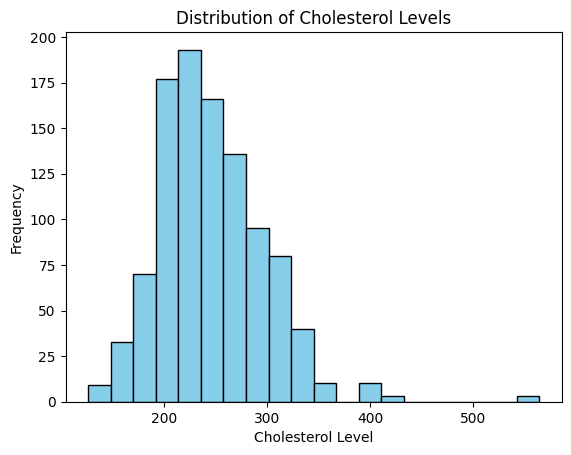

In [ ]:

plt.hist(df['chol'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')
plt.show()

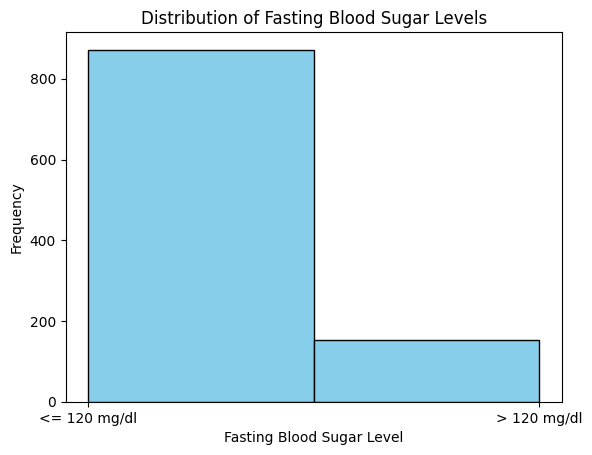

In [ ]:
plt.hist(df['fbs'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Fasting Blood Sugar Level')
plt.ylabel('Frequency')
plt.title('Distribution of Fasting Blood Sugar Levels')
plt.xticks([0, 1], ['<= 120 mg/dl', '> 120 mg/dl'])  # Customizing x-axis ticks for better readability
plt.show()

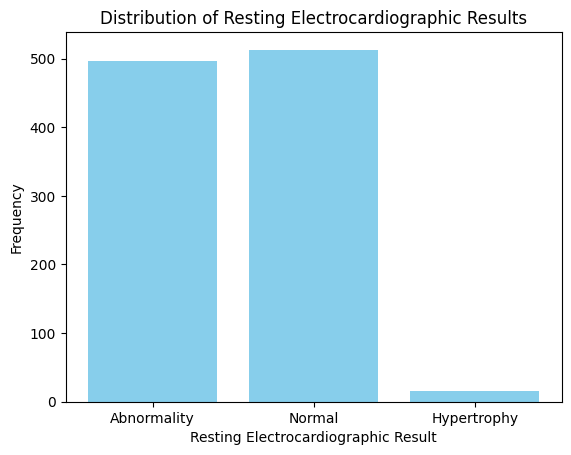

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame if it's different

# Count the occurrences of each category in the 'restecg' column
restecg_counts = df['restecg'].value_counts()

# Plot a bar graph of resting electrocardiographic results
plt.bar(restecg_counts.index, restecg_counts.values, color='skyblue')
plt.xlabel('Resting Electrocardiographic Result')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Electrocardiographic Results')
plt.xticks(restecg_counts.index, ['Normal', 'Abnormality', 'Hypertrophy'])
plt.show()


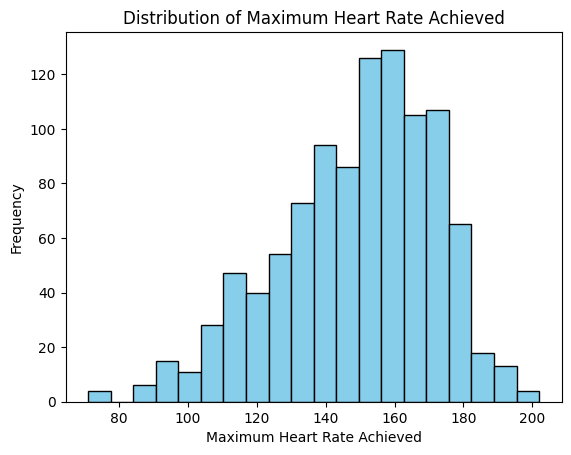

In [ ]:

plt.hist(df['thalach'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.show()

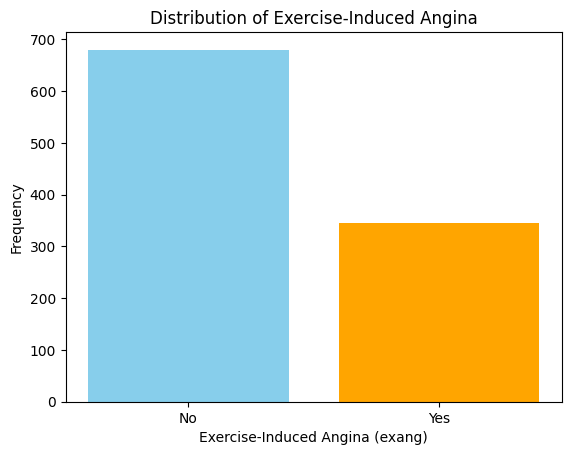

In [ ]:
# Count the occurrences of each category in the 'exang' column
exang_counts = df['exang'].value_counts()

# Plot a bar graph of exercise-induced angina
plt.bar(exang_counts.index, exang_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Frequency')
plt.title('Distribution of Exercise-Induced Angina')
plt.xticks(exang_counts.index, ['No', 'Yes'])
plt.show()

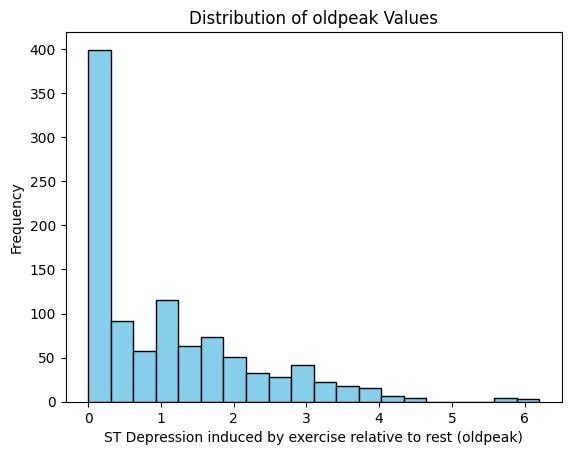

In [ ]:
plt.hist(df['oldpeak'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('ST Depression induced by exercise relative to rest (oldpeak)')
plt.ylabel('Frequency')
plt.title('Distribution of oldpeak Values')
plt.show()

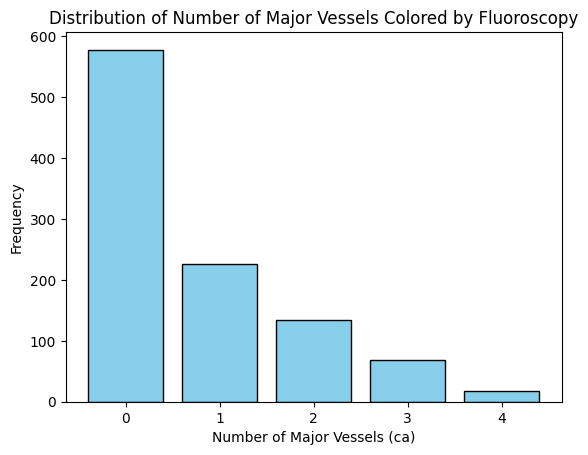

In [ ]:
ca_counts = df['ca'].value_counts()

# Sort the counts by index
ca_counts = ca_counts.sort_index()

# Plot a bar graph of the number of major vessels colored by fluoroscopy
plt.bar(ca_counts.index, ca_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Major Vessels Colored by Fluoroscopy')
plt.show()

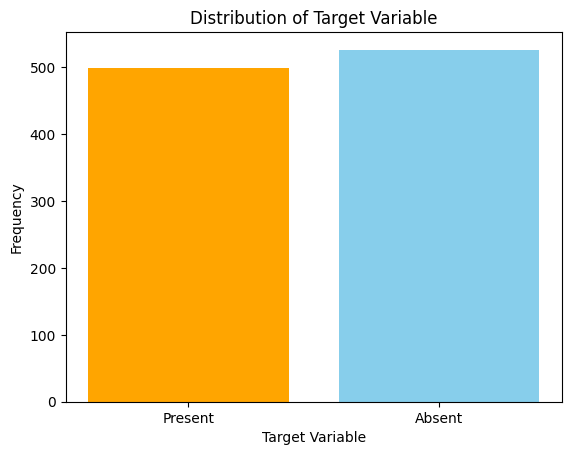

In [ ]:
target_counts = df['target'].value_counts()

# Plot a bar graph of the target variable
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.xticks(target_counts.index, ['Absent', 'Present'])
plt.show()

<ipython-input-23-c6595c7193ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cp', palette='viridis')


Text(0, 0.5, 'Count')

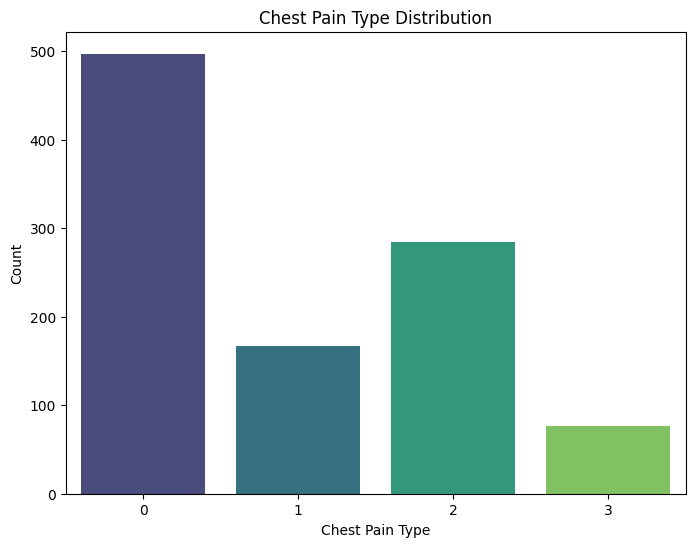

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', palette='viridis')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

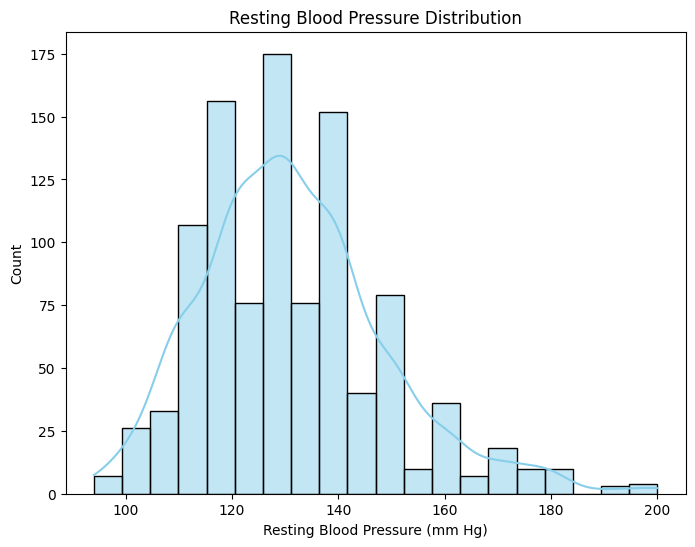

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='trestbps', bins=20, kde=True, color='skyblue')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')

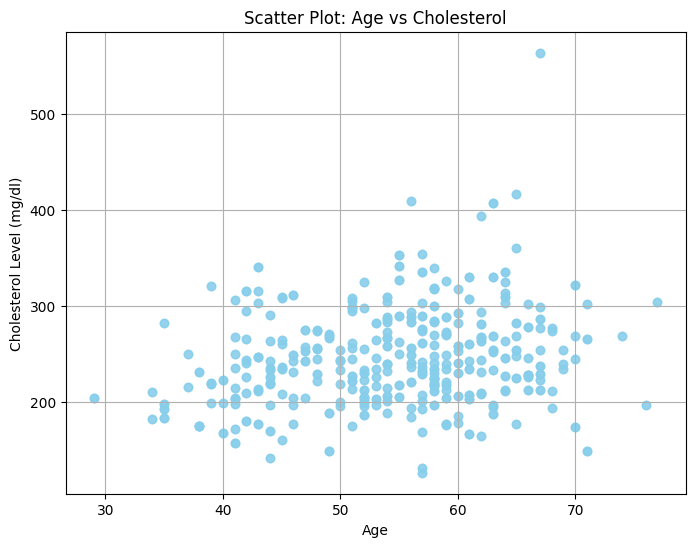

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['chol'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.grid(True)
plt.show()